In [53]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
from src.neuro_fuzzy import *

In [55]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], -1)) / 255.0
X_test = X_test.reshape((X_test.shape[0], -1)) / 255.0
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42)

In [56]:
max_neurons = 10
threshold_epochs = 3
architecture = NeuroFuzzyNetwork(
    X_train_lstm.shape[2], y_train.shape[1], 10, 5)
neurogenesis = NeuroGenesis(architecture, max_neurons, threshold_epochs)

# Train and test the model
X_train_lstm = X_train_lstm.reshape((X_train_lstm.shape[0], 1, -1))
X_test_lstm = X_test_lstm.reshape((X_test_lstm.shape[0], 1, -1))

architecture.train(X_train_lstm, y_train, epochs=10)
predictions = architecture.predict(X_test_lstm)

# Evaluate accuracy
rounded_predictions = np.round(predictions)
accuracy = accuracy_score(np.argmax(y_test, axis=1),
                          np.argmax(rounded_predictions, axis=1))
print(f"Accuracy: {accuracy}")

313/313 [==============================] - 1s 1ms/step
Accuracy: 0.9008


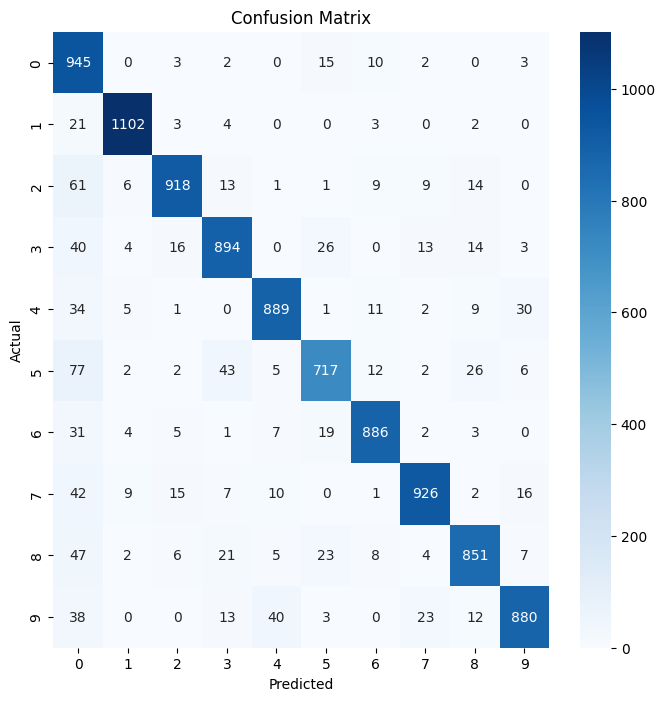

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.96      0.82       980
           1       0.97      0.97      0.97      1135
           2       0.95      0.89      0.92      1032
           3       0.90      0.89      0.89      1010
           4       0.93      0.91      0.92       982
           5       0.89      0.80      0.85       892
           6       0.94      0.92      0.93       958
           7       0.94      0.90      0.92      1028
           8       0.91      0.87      0.89       974
           9       0.93      0.87      0.90      1009

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



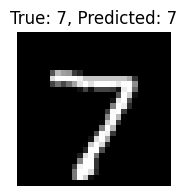

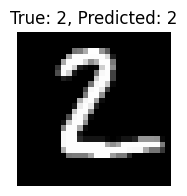

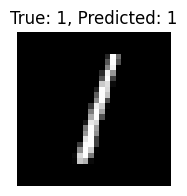

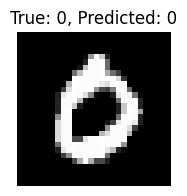

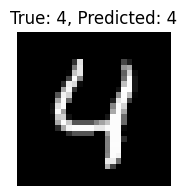

In [58]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Function to plot classification report


def plot_classification_report(y_true, y_pred, classes):
    report = classification_report(y_true, y_pred, target_names=classes)
    print("Classification Report:\n", report)


# Plot confusion matrix
y_test_true = np.argmax(y_test, axis=1)
rounded_predictions = np.round(predictions)
y_test_pred = np.argmax(rounded_predictions, axis=1)
classes = [str(i) for i in range(10)]

plot_confusion_matrix(y_test_true, y_test_pred, classes)
plot_classification_report(y_test_true, y_test_pred, classes)

# Plot predicted and true labels for the first 5 digits
for i in range(5):
    plt.figure(figsize=(2, 2))
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_test_true[i]}, Predicted: {y_test_pred[i]}')
    plt.axis('off')
    plt.show()